In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,5,50)

In [3]:
y = 1.2*x+0.8

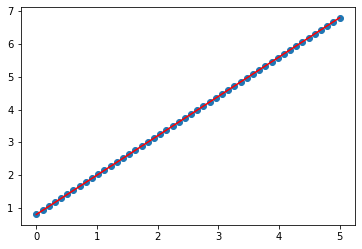

In [4]:
plt.scatter(x,y)
plt.plot(x,y,"r")

In [5]:
# randn = 平均值是0, 標準差是1
y = 1.2*x+0.8+ 0.6*np.random.randn(50)

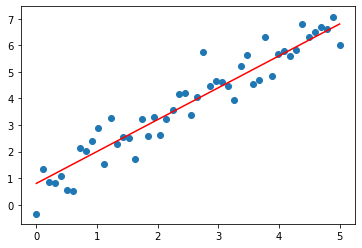

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, "r")

In [69]:
from sklearn.linear_model import LinearRegression

In [8]:
regr = LinearRegression()

In [9]:
X = x.reshape(50,1)

In [10]:
# X = 資料, y =正確答案
regr.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
Y = regr.predict(X)

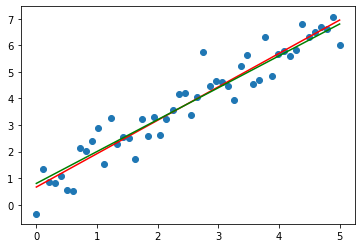

In [12]:
plt.scatter(x,y)
plt.plot(x, Y, "r")
plt.plot(x, 1.2*x+0.8, "g")

In [13]:
from ipywidgets import interact

In [14]:
x = np.linspace(0,5,50)
y = 1.2*x+0.8+ 0.6*np.random.randn(50)

In [15]:
X = np.linspace(0,5,1000)

def my_fit(n):
    Y = 4*np.sin(n*X) +4
    plt.scatter(x,y)
    plt.plot(X,Y, "r")
    plt.show()

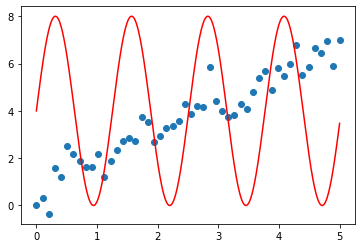

In [16]:
my_fit(5)

In [17]:
interact(my_fit, n=(1,500))

interactive(children=(IntSlider(value=250, description='n', max=500, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

In [18]:
x = np.linspace(0,5,100)
y = 1.2*x+0.8+0.5*np.random.randn(100)

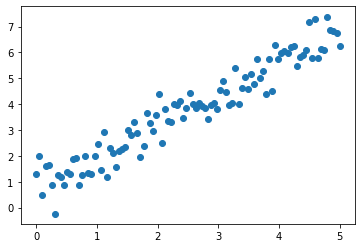

In [19]:
plt.scatter(x,y)

In [20]:
from sklearn.model_selection import train_test_split

### 把x,y中的80%給training data, 20%給testing data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=87)

In [22]:
len(x_train)

80

In [23]:
len(x_test)

20

In [24]:
x_train = x_train.reshape(80,1)

In [25]:
x_test.shape = (20,1)

In [26]:
x_test

array([[0.80808081],
       [4.09090909],
       [4.29292929],
       [1.61616162],
       [1.96969697],
       [1.26262626],
       [1.31313131],
       [1.46464646],
       [3.28282828],
       [0.35353535],
       [4.24242424],
       [5.        ],
       [2.92929293],
       [3.53535354],
       [4.64646465],
       [3.73737374],
       [0.15151515],
       [0.        ],
       [2.22222222],
       [1.66666667]])

In [27]:
from sklearn.linear_model import LinearRegression

### 建立函數學習機

In [28]:
regr = LinearRegression()

### 訓練資料

In [29]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

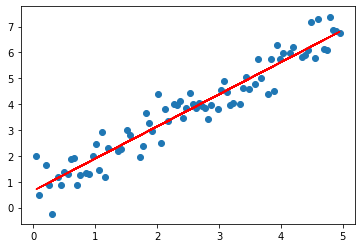

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), "r")

### 用測試資料試試我們預測準不準

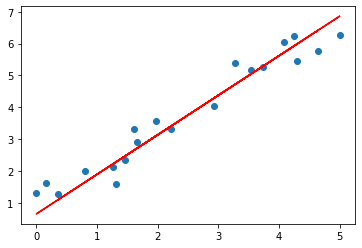

In [31]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), "r")

### Scikit-learn 使用真實世界數據分析

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 讀入boston數據

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
len(boston.feature_names)

13

In [37]:
X = boston.data
Y = boston.target #價格

In [38]:
boston_df = pd.DataFrame(X, columns = boston.feature_names)

In [39]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
x_test1, x_train1, y_test1, y_train1 = train_test_split(X,Y, 
                                                                test_size = 0.3, 
                                                                random_state = 87)

In [41]:
regr = LinearRegression()

In [42]:
regr.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_predict = regr.predict(x_test1)

Text(0, 0.5, 'Predicted Price')

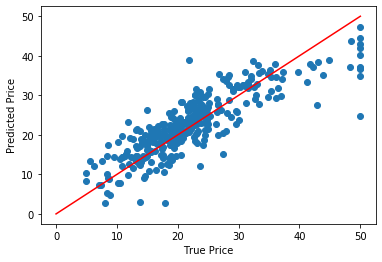

In [44]:
plt.scatter(y_test1, y_predict)
plt.plot([0,50], [0,50], "r")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

In [78]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test1, y_predict)))

test_set_r2 = r2_score(y_test1, y_predict)

In [79]:
print(test_set_rmse)
print(test_set_r2)

4.691879348471463
0.7161087957439826


In [77]:
#print(boston.DESCR)

### [小技巧] 善用enumerate

In [46]:
L = ["a","b","c"]

In [47]:
for i in range(3):
    print(i+1, L[i])

1 a
2 b
3 c


In [48]:
list(enumerate(L))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [49]:
for i in enumerate(L):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')


In [50]:
for i, s in enumerate(L):
    print(i+1,s)

1 a
2 b
3 c


In [51]:
x = np.linspace(-10,10,200)

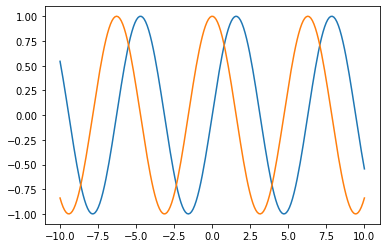

In [52]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

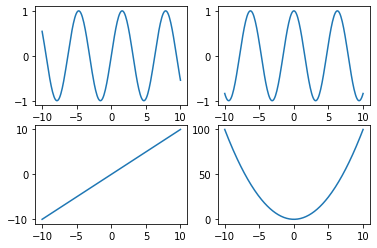

In [53]:
plt.subplot(2,2,1)
plt.plot(x, np.sin(x))

plt.subplot(2,2,2)
plt.plot(x, np.cos(x))

plt.subplot(2,2,3)
plt.plot(x,x)

plt.subplot(2,2,4)
plt.plot(x,x**2)



### Boston房價 每個feature和房價的關係圖

In [54]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


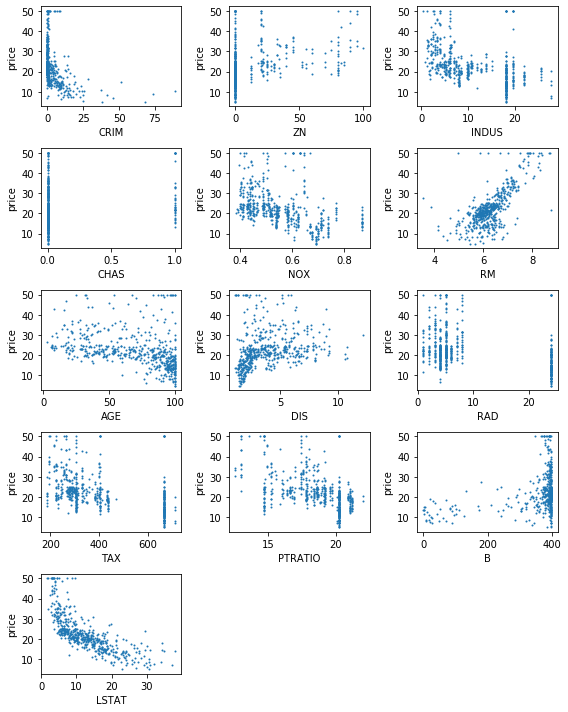

In [55]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(X[:,i], Y, s=1)
    plt.ylabel("price")
    plt.xlabel(feature)
    plt.tight_layout()
    

### 選擇更好的feature做預測

In [56]:
bh_data = load_boston()

In [57]:
print(bh_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [58]:
boston = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)

In [59]:
boston['MEDV'] = bh_data.target

In [60]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT','RM'])
Y = boston['MEDV']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [62]:
lin_reg_mod = LinearRegression()

In [63]:
lin_reg_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
pred = lin_reg_mod.predict(x_test)

Text(0, 0.5, 'Predicted Price')

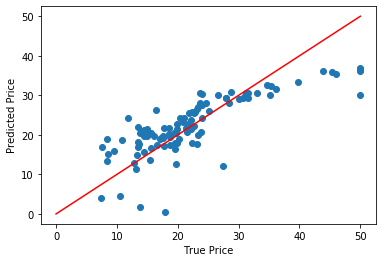

In [76]:
plt.scatter(y_test, pred)
# plt.scatter(y_test1, y_predict, "g")
plt.plot([0,50], [0,50], "r")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [74]:
print(test_set_rmse) # Note that for rmse, the lower that value is, the better the fit
print(test_set_r2) # The closer towards 1, the better the fit

6.035041736063677
0.6400551238836979
